## CSE 514 Assignment 1 - Regression
### Author: Shane Canfield

Before we begin let's install some dependencies

In [ ]:
pip install matplotlib

In [600]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 7.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.0 MB/s eta 0:00:0000:01
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn ... done
Note: you may need to restart the kernel to use updated packages.


## Uni-variate Linear Regression

### Data Processing and Model Design

We can describe a uni-variate linear regression model as a model that describes the relationship between the predictor variable and a single independent variable x.

For this assignment we will be using the Concrete Compressive Strength dataset in the UCI repository at: UCI Machine Learning Repository: Concrete Compressive Strength Data Set
(https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

We have 1030 instances in this dataset, and we will be using 900 instances for training and 130 instances for testing, randomly selected. Let's read the data csv file and see what we're wokring with:



In [51]:
import pandas as pd

df = pd.read_csv("Concrete_Data.csv")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Let's see if there are any null values that we need to worry about.

In [21]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

There aren't any null values. So we can move on from with data processing. Let's start by selecting 900 random samples of our dataframe, and separating our a single dependent variable and our predictor variable. We'll also normalize our dataset and set the number of samples we are working with to N.

For our univariate linear regression, we are going to use "Cement (component 1)(kg in a m^3 mixture)" to try and explain the concrete comprehensive stregth predictor variable. Just glancing at the data, there appears to be a relationship betmeen the cement kg in a m^3 mixture and the relative strength, so let's see if this is the case.

In [362]:
import numpy as np

Xy_900 = df.sample(n=900)

X = Xy_900["Cement (component 1)(kg in a m^3 mixture)"]
y = Xy_900["Concrete compressive strength(MPa, megapascals) "]

#Normalize dataset
y = np.array((y-y.mean())/y.std())
X = np.array((X-X.mean())/X.std())

N = X.shape[0]

Text(0, 0.5, 'Loss')

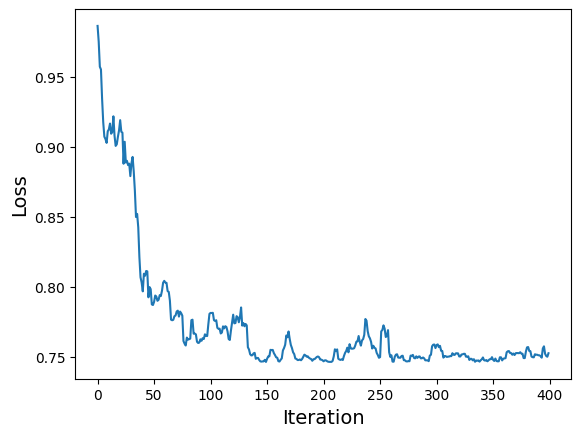

In [619]:
#The linear regression
import matplotlib.pyplot as plt


#Helper Functions
#Create stochastic gradient descent function
def gradientDescent(X, y, m, b, learning_rate):

    N = X.shape[0]

    #Stochastic - random sample
    Xy900_standard = (Xy_900 - Xy_900.mean())/Xy_900.std()
    rand_sample = Xy900_standard.sample(n=1)
    #rand_sample = Xy_900.sample(n=1)

    X_rand = rand_sample["Cement (component 1)(kg in a m^3 mixture)"].values
    y_rand = rand_sample["Concrete compressive strength(MPa, megapascals) "].values

    #n becomes number of samples in batch?
    yhat = m*X_rand + b
    dldm = -2 * X_rand * (y_rand - yhat)
    dldb = -2 * (y_rand - yhat)

    #Non-stochastic
    #yhat = m*X + b
    #dldm = 1/N*sum(-2*X * (y - yhat))
    #dldb = 1/N*sum(-2*(y - yhat))

    m = m - learning_rate*dldm
    b = b - learning_rate*dldb
   
    return m, b


def linearRegression(X, y, learning_rate, epochs):
    m = 0.0
    b = 0.0
    n = X.shape[0]
    cost = np.zeros(epochs)

    #Iteratively make updates
    for i in range(epochs):
        #Run gradient descent
        m, b = gradientDescent(X, y, m, b, learning_rate)
        yhat = m*X + b
        #yhat = b+np.dot(X,m)

        cost[i] = np.divide(np.sum((y - yhat)**2, axis=0), n)
        #print(f'{epoch} loss is {loss}, parameters m: {m}, b:{b}')
        #plt.scatter(X, y, c='b')
        #plt.plot(X,yhat)
        
        #Add threshold
    return m, b, cost

#Linear regression with 400 epochs
m, b, cost = linearRegression(X, y, 0.01, 400)
plt.plot(cost)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)


With stocastic gradient descent we can see the expected "bumpy" nature of the algorithm as it chooses random samples to optimize. Even so, we still see the overall sudden decrease and plateau of Loss value as iterations increase!

### Performance Analysis

Using the remaining 130 rows, let's make some predictions.

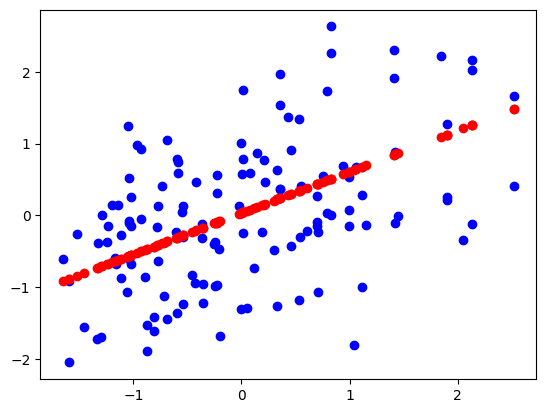

In [620]:
remaining = df[~df.index.isin(Xy_900.index)]
X_test = remaining["Cement (component 1)(kg in a m^3 mixture)"]
y_test = remaining["Concrete compressive strength(MPa, megapascals) "]

y_test = np.array((y_test-y_test.mean())/y_test.std())
X_test = np.array((X_test-X_test.mean())/X_test.std())

predictions = []

for x in X_test:
    predictions.append(x*m + b)

plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, np.array(predictions), color='red')
#plt.plot(X_test, np.array(predictions))


The trend looks pretty decent, so let's calculate our R-squared value to see how much of our data can be explained by our model.

In [618]:
def r_squared(predictions, labels):
        
    num = np.square(labels - predictions).mean()
    
    denom = np.square(labels - labels.mean()).mean()
    
    r2 = 1 - num/denom
    
    return r2


print(r_squared(predictions, y_test))

-0.31610787756234715


In [621]:
from sklearn import metrics

print(metrics.r2_score(y_test, predictions))

0.1997636979920151


According to our R-squared value, the model can explain 19.2% of our data.

## Multi-variate linear regression

### Data Processing and Model Design

In [439]:
import numpy as np

Xy_900_mv = df.sample(n=900)
Xy_900_mv = (Xy_900_mv - Xy_900_mv.mean())/Xy_900_mv.std()


y_mv = Xy_900_mv["Concrete compressive strength(MPa, megapascals) "].values
X_mv = Xy_900_mv.iloc[: , :-1].values #remove last column

N_mv = X_mv.shape[0]

In [399]:
X_mv

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
667,-0.848420,2.506299,-0.842351,0.475365,-1.032585,-0.547656,-0.726571,-0.281550
647,-1.183963,1.901938,-0.842351,0.475365,-1.032585,-0.476343,0.087039,0.691056
347,-0.640383,-0.840934,1.877646,-1.274177,0.679098,1.027594,0.027050,0.157691
19,1.864684,-0.840934,-0.842351,2.168471,-1.032585,-0.519640,-2.252560,2.102905
121,1.864684,0.539800,-0.842351,-0.037269,0.460942,-1.537121,0.090789,-0.281550
...,...,...,...,...,...,...,...,...
947,0.185052,-0.840934,1.022878,1.392464,0.628754,-1.204753,-0.582846,-0.281550
540,1.912619,-0.840934,-0.842351,0.475365,-1.032585,-0.466155,-0.775313,-0.673731
184,-0.556977,-0.840934,0.663222,0.348383,-0.277431,-0.072661,1.200598,-0.673731
244,-0.406462,-0.840934,0.622741,0.226103,0.142099,-0.291694,0.909398,-0.673731


Text(0, 0.5, 'Loss')

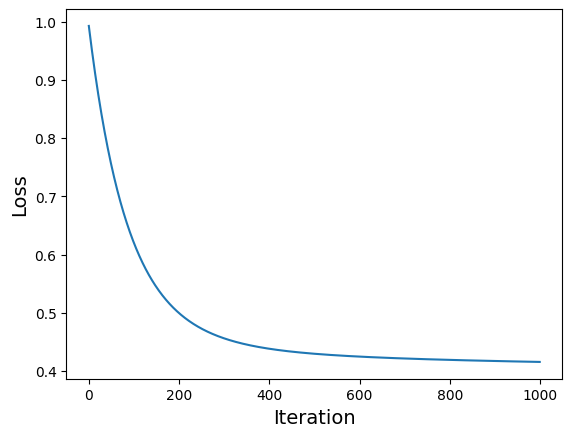

In [581]:
#The MV linear regression
import matplotlib.pyplot as plt
import numpy as np

Xy_900_mv = df.sample(n=900)
Xy_900_mv = (Xy_900_mv - Xy_900_mv.mean())/Xy_900_mv.std()


y_mv = Xy_900_mv["Concrete compressive strength(MPa, megapascals) "].values
X_mv = Xy_900_mv.iloc[: , :-1] #remove last column

N_mv = X_mv.shape[0]

def gradientDescentMulti(X, y, w, learning_rate):
    
    #Non-stochastic
    N = X.shape[0]

    yhat = np.matmul(X, w)
    
    #dldw = 1/N * np.sum((np.dot(X.T, yhat - y)), axis = 0)
    dldw = 1/(2*N) * np.matmul(X.T, yhat - y)
    
    #dldb = 1/N * (np.sum(yhat - y))

    w = w - learning_rate*dldw
    #b = b - learning_rate*dldb

    return w

def MVLinearRegression(X, y, learning_rate, epochs):

    #Stochastic?
    #w = np.random.randn(X.shape[1])
    
    #Non stochastic
    w = np.zeros(X.shape[1])
    n = y.shape[0]
    cost = np.zeros(epochs)
    
    #Iteratively make updates
    for i in range(epochs):
        #Run gradient descent
        w = gradientDescentMulti(X, y, w, learning_rate)
        #New yhat
        yhat = np.dot(X,w)

        cost[i] = np.divide(np.sum((y - yhat)**2, axis=0), n)
        #print(f'{epoch} cost is {cost}, parameters w: {w}, b:{b}')

    return w, cost

#Linear regression with 400 epochs
w, cost = MVLinearRegression(X_mv, y_mv, 0.01, 1000)
plt.plot(cost)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)



### Performance Analysis

In [610]:
remaining = df[~df.index.isin(Xy_900_mv.index)]

remaining = (remaining - remaining.mean())/remaining.std()

X_mv_test = remaining.iloc[: , :-1] #remove last column
y_mv_test = remaining["Concrete compressive strength(MPa, megapascals) "]

predictions_mv = []

predictions_mv_test = np.dot(X_mv_test, w)

print(metrics.r2_score(y_mv_test, predictions_mv_test))


#plt.scatter(X_mv_test.values, y_mv_test.values, color='blue')


0.6918405063601982
